(sec:interval-predictor-models)=
Learning bounds on a model
--------------------------

Instead of learning a probability distribution to describe the effect of
one variable on another, one may instead attempt to learn a function
which maps the input variables to an interval representing the possible
range of the output. Such models are known as interval predictor models.
Sometimes the predicted intervals have an associated confidence level
(or a bound on the confidence level), and as such they can be considered
as bounds on the quantiles of a random variable
{cite}`dabney2017distributional`. Typically the obtained intervals represent
an outer approximation, i.e. the intervals are overly wide and hence
conservative in an engineering sense. An interval predictor model can be
seen as prescribing the support of a Random Predictor Model, which is
defined as a function which maps input variables to an output random
variable. A Gaussian Process Model is a specific case of a Random
Predictor Model.

In this section, we describe how interval predictor models can be
trained in practice. We then describe how the theory of scenario
optimisation can be used to provide guaranteed bounds on the reliability
of the trained interval predictor models, for the purpose of validation.

### Training interval predictor models

Let us consider a black box model (sometimes referred to as the Data
Generating Mechanism or DGM) which acts on a vector of input variables
$x \in \mathbb{R}^{n_x}$ to produce an output $y \in \mathbb{R}$. We
wish to obtain the two functions $\overline{y}(x)$ and
$\underline{y}(x)$ which enclose a fraction, $\epsilon$, of samples from
the DGM, i.e. samples of $y(x)$ where $x$ is sampled from some unknown
probability density. The functions $\overline{y}(x)$ and
$\underline{y}(x)$ are bounds on a prediction interval, and as such we
wish them to be as tight as possible. This can be written as a so-called
chance constrained optimisation program:
$\operatorname{argmin}_{\boldsymbol{p}}{\{\mathbb{E}_x(\overline{y}_{\boldsymbol{p}}(x) - \underline{y}_{\boldsymbol{p}}(x)) : P\{\overline{y}_{\boldsymbol{p}}(x) > y(x) > \underline{y}_{\boldsymbol{p}}(x) \} \le \epsilon\}},$
where $\boldsymbol{p}$ is a vector of function parameters to be
identified, and $\epsilon$ is a parameter which constrains how often the
constraints may be violated. Chance constrained optimisation programs
can be solved by using a so-called scenario program, where the chance
constraint is replaced with multiple sampled constraints based on data,
i.e.
```{math}
:label: ch3:ipm_op
\operatorname{argmin}_{\boldsymbol{p}}{\{\mathbb{E}_x(\overline{y}_{\boldsymbol{p}}(x) - \underline{y}_{\boldsymbol{p}}(x)) : \overline{y}_{\boldsymbol{p}}(x^{(i)}) > y^{(i)} > \underline{y}_{\boldsymbol{p}}(x^{(i)}), i=1,...,N\}},
```
where
$\mathcal{X}_\text{train} = \{ \{x^{(1)}, y^{(1)}\}, ..., \{x^{(n)}, y^{(n)}\} \}$
are sampled from the DGM. Most of the literature on scenario
optimisation Theory aims to obtain bounds on $\epsilon$. Finding bounds
on $\epsilon$ using scenario optimisation is easier in practice than
other similar methods in statistical learning theory, since no knowledge
of the Vapnik-Chervonenkis dimension (a measure of the capacity of the
model, which is difficult to determine exactly) is required.

A key advantage over other machine learning techniques is that interval
training data (i.e. where the training data inputs are given in the form
$x^{(i)} \in [\underline{x}^{(i)}, \overline{x}^{(i)}]$ due to epistemic
uncertainty or some other reason) fits into the scenario optimisation
framework coherently {cite}`lacerda2017interval`. This can be seen as
equivalent to defending against the attack model of adversarial examples
considered by {cite}`madry2017towards`, where the network is trained to produce
the same outputs for small perturbations of the input data. The
framework also permits robustness against uncertainty in training
outputs, i.e. $y^{(i)} \in [\underline{y}^{(i)}, \overline{y}^{(i)}]$,
where $y^{(i)}$ is a single training example output.

#### Convex interval predictor models

If the objective and constraints for the scenario program are convex
then the program can be easily solved, and bounds can be put on
$\epsilon$. We will approximate the DGM with an interval predictor model
(IPM) which returns an interval for each vector $x\in X$, the set of
inputs, given by
```{math}
:label: eq:2
I_y(x,P)= \big\{ y=G(x,\boldsymbol{p}),\boldsymbol{p} \in P \big\},
```
where $G$ is an arbitrary function and $\boldsymbol{p}$ is a parameter
vector. By making an approximation for $G$ and considering a linear
parameter dependency {eq}`eq:2` becomes
$I_y(x,P)=\big\{ y=\boldsymbol{p}^{T} \phi (x),\boldsymbol{p} \in P \big\} ,$
where $\phi (x)$ is a basis (polynomial and radial bases are commonly
used), and $\boldsymbol{p}$ is a member of a convex parameter set. The
convex parameter set is usually assumed to be either ellipsoidal or
hyper-rectangular {cite}`campi2009interval`. {cite}`crespo_interval_2016`
demonstrates that hyper-rectangular parameters sets result in an IPM
with bounds with a convenient analytical form. The hyper-rectangular
parameter uncertainty set can be defined as
$P=\big\{\boldsymbol{p}:\underline{\boldsymbol{p}} \leq \boldsymbol{p} \leq \overline{\boldsymbol{p}} \big\},$
where $\underline{\boldsymbol{p}}$ and $\overline{\boldsymbol{p}}$ are
parameter vectors specifying the defining vertices of the hyper
rectangular uncertainty set. The IPM with linear parameter dependency on
the hyper-rectangular uncertain set of parameters is defined by the
interval
$I_y(x,P)=[\underline{y}(x,\overline{\boldsymbol{p}},\underline{\boldsymbol{p}}),\overline{y}(x,\overline{\boldsymbol{p}},\underline{\boldsymbol{p}})],$
where $\underline{y}$ and $\overline{y}$ are the lower and upper bounds
of the IPM, respectively. Explicitly, the lower bound is given by
$\underline{y}(x,\overline{\boldsymbol{p}},\underline{\boldsymbol{p}}) = \overline{\boldsymbol{p}} ^T \left(
      \frac{\phi(x)-|\phi(x)|}{2}
      \right)+\underline{\boldsymbol{p}} ^T \left(
      \frac{\phi(x)+|\phi(x)|}{2}
      \right),$ and the upper bound is given by
$\overline{y}(x,\overline{\boldsymbol{p}},\underline{\boldsymbol{p}}) = \overline{\boldsymbol{p}} ^T \left(
      \frac{\phi(x)+|\phi(x)|}{2}
      \right)+\underline{\boldsymbol{p}} ^T \left(
      \frac{\phi(x)-|\phi(x)|}{2}
      \right).$ To identify the hyper-rectangular uncertainty set one
trains the IPM by minimising the value of
$\delta_y(x,\overline{\boldsymbol{p}},\underline{\boldsymbol{p}})=(\overline{\boldsymbol{p}}-\underline{\boldsymbol{p}})^T |\phi (x) |,$
subject to the constraint that the training data points fall inside the
bounds on the IPM, by solving the linear and convex optimisation problem

```{math}
:label: op
\big\{\hat{\underline{\boldsymbol{p}}} , \hat{\overline{\boldsymbol{p}}} \big\}=\operatorname{argmin}_{\boldsymbol{u},\boldsymbol{v}} \big\{\mathbb{E}_x[\delta_y(x,\boldsymbol{v},\boldsymbol{u})] : \underline{y}(x^{(i)},\boldsymbol{v},\boldsymbol{u}) \leq y^{(i)} \leq \overline{y}(x^{(i)},\boldsymbol{v},\boldsymbol{u}), \boldsymbol{u} \leq \boldsymbol{v} \big\}.
```
The constraints ensure that all data points to be fitted lie within the
bounds and that the upper bound is greater than the lower bound. This
combination of objective function and constraints is linear and convex
{cite}`crespo_interval_2016`. In this thesis all interval predictor models
have polynomial bases, i.e. $\phi(x)=\left[1,x^{i_2},x^{i_3},...\right]$
with $x=[x_a,x_b,...]$ and $i_j=[i_{j,a},i_{j,b},...]$ with $i_j\ne i_k$
for $j\ne k$.

For illustrative purposes an example degree 2 IPM is shown without
training data points in
{ref}`fig:sub1`. The hyper rectangular uncertainty set
corresponding to the IPM in
{ref}`fig:sub1` is plotted in
{ref}`fig:sub2`. The
discontinuity observed in the upper and lower bounds is a consequence of
the chosen basis, and can be avoided by choosing a basis where
$\phi(x)=|\phi(x)|$.

```{figure} figures/ipm_explain_1.png
---
height: 150px
name: fig:sub1
---
The IPM's hyper rectangular uncertainty set plotted in 'parameter
space'. The uniformly sampled parameter vectors of the polynomials shown
in {ref}`fig:sub2`.
```

```{figure} figures/IPM_explain_2.png
---
height: 150px
name: fig:sub2
---
The IPM's hyper rectangular uncertainty set plotted in 'parameter
space'. The uniformly sampled parameter vectors of the polynomials shown
in {ref}`fig:sub1` are displayed as points in the uncertain
set.
```

#### Non-convex interval predictor models

In some circumstances engineers may wish to represent more complex
functions with IPMs, and hence the functions used to represent the
bounds of the IPM may have more trainable parameters. The interior point
method used to solve linear optimisation programs, such as those used
for convex IPMs, has complexity $d^2 n_\text{cons}$, where $d$
represents the number of optimisation variables and $n_\text{cons}$
represents the number of constraints in the optimisation (which in this
case scales linearly with the number of training data points), and hence
the method does not scale well to IPMs with large numbers of trainable
parameters {cite}`boyd2004convex`.

Neural networks enable uncertainty models to be created with vast
numbers of parameters in a feasible computational time. Neural networks
with interval outputs were proposed by {cite}`ishibuchi1993architecture`, and
further described by {cite}`huang1998robust`. In these papers the learning
takes place by identifying the weights $W$, which solve the following
program:
```{math}
:label: eq:ishibuchi
\operatorname{argmin}_{\overline{W},\underline{W}}{[\mathbb{E}_x(\overline{y}(x)-\underline{y}(x)) :\overline{y}(x^{(i)})>y^{(i)}>\underline{y}(x^{(i)})\ \forall \ i]},
```
where $\overline{y}(x)$ and $\underline{y}(x)$ are obtained from two
independent neural networks, such that $\overline{y}(x)$ and
$\underline{y}(x)$ are the output layers of networks, such as those
defined by {eq}`eq:net`. In practice this problem is solved by using a mean
squared error loss function with a simple penalty function to model the
constraints. In general, penalty methods require careful choice of
hyper-parameters to guarantee convergence. These neural networks act in
a similar way to interval predictor models, however the interval neural
networks do not attempt to use the training data set to bound
$\epsilon$. {cite}`freitag2011recurrent` define similar networks with fuzzy
parameters to operate on fuzzy data. The fuzzy neural networks are
trained by minimising a least square loss function (a set inclusion
constraint is not used), which can also be applied to time series data
sets. These approaches are very different from the approach of
{cite}`patino2004interval`, where a traditional neural network loss function is
intervalised using interval arithmetic.

{cite}`campi2015non` extended the scenario approach to non-convex optimisation
programs, and hence applied the approach to a single layer neural
network, with a constant width interval prediction, which was trained
using the interior-point algorithm in Matlab. In other words the
following program is solved:
```{math}
:label: constantLine
\operatorname{argmin}_{W,h}{[h : |y^{(i)}-\hat{y}(x^{(i)})|<h\ \forall \ i]},
```
where $h$ is a real number, and $\hat{y}$ represents the central line of
the prediction obtained from the same network specified by
{eq}`eq:net`. The
bounds on the prediction interval are therefore given by
$\overline{y}(x) = \hat{y}(x) + h$ and
$\underline{y}(x) = \hat{y}(x) - h$. The constant width interval neural
network expresses homoscedastic uncertainty. The solution to the
optimisation program in
{eq}`constantLine` can also be obtained by finding the neural
network weights which minimise the so-called maximum-error loss:
```{math}
:label: max-error-loss
\mathcal{L}_{\text{max-error}} = \max_{i} |y^{(i)}-\hat{y}(x^{(i)})|, %\equiv \lim_{p \rightarrow \infty} \left( \sum_i |y^{(i)}-\hat{y}(x^{(i)})|^{p} \right) ^{\frac{1}{p}},
```
where $h$ is the minimum value of the loss.
It is trivial to show this is true, since the set inclusion constraint
in {eq}`constantLine` requires that $h$ is larger than the absolute
error for each data point in the training set {cite}`CARE201871`.

In {cite}`sadeghi2019efficient` a back propagation algorithm for Neural Networks with interval predictions is proposed. 
A modified maximum-error loss is used.
The approach can accommodate incertitude in the training data.
A key result is that, by using minibatches, the complexity of the proposed approach does not directly depend upon the number of training data points as with other Interval Predictor Model methods. 


(sec:scenario)=
### Validating models with the scenario approach

We will first present an overview of the scenario optimisation theory
for the validation of models in the convex case, before describing more
general techniques which apply in the non-convex case.

#### Convex case

Intuition tells us that the solution of the scenario program will be
most accurate when the dimensionality of the design variable is low and
we take as many samples of the constraints as possible (in fact, an
infinite number of sampled constraints would allow us to reliably
estimate
$P\{\overline{y}_{\boldsymbol{p}}(x) > y(x) > \underline{y}_{\boldsymbol{p}}(x) \}$,
and hence solve the program exactly). However, in practice obtaining
these samples is often an expensive process. Fortunately, the theory of
scenario optimisation provides robust bounds on the robustness of the
obtained solution. The bounds generally take the following form:
$P^n(V(\hat{z}_n)>\epsilon)\le\beta.$ This equation states that the
probability of observing a bad set of data (i.e. a bad set of
constraints) in future, such that our solution violates a proportion
greater than $\epsilon$ of the constraints (i.e. $V(\hat{z}_n)>\epsilon$
where $V(\hat{z}_n) = \frac{1}{n} \sum_i^n {V^{(i)}}$ and $V^{(i)} = 1$
only if
$\overline{y}_{\boldsymbol{p}}(x) > y(x) > \underline{y}_{\boldsymbol{p}}(x)$),
is no greater than $\beta$. The scenario approach gives a simple
analytic form for the connection between $\epsilon$ and $\beta$ in the
case that the optimisation program is convex:
```{math}
:label: convexrel
\beta=\frac{1}{\epsilon}\frac{d}{n+1},
```
where $n$ is
the number of constraint samples in the training data set used to solve
the scenario program, and $d$ is the dimensionality of the design
variable, $z$. For a fixed $d$ and $n$ we obtain a
confidence-reliability relationship: by decreasing
$\epsilon$ slightly, $1-\beta$ can be made to be insignificantly small.
Other tighter bounds exist in the more recent scenario optimisation
literature, e.g.
{cite}`calafiore2010random` {cite}`campi2008exact` {cite}`alamo2015randomized`, for
example
```{math}
:label: ch3:reliability
\beta = \sum_{i=0}^{d-1} \binom{n}{i} \epsilon^i (1-\epsilon)^{n-i}.
```
Crucially the assessment of $V(\hat{z}_n)$ is possible a priori,
although other techniques exist {cite}`barrera2016chance`. {cite}`care2015scenario`
analyse the reliability of solutions of the maximum error loss functions
({eq}`max-error-loss`) in the scenario framework when $\hat{y}(x)$
is convex in $x$ and the function weights.

In the convex case, the a priori assessment is made possible by the fact
that the number of support constraints (the number of constraints which
if removed result in a more optimal solution) for a convex program is
always bounded by the dimensionality of the design variable.
{cite}`campi2018wait` explore this connection for convex programs in further
detail, by analysing the number of support constraints after a solution
is obtained. In fact, the bound in
{eq}`ch3:reliability` if often overly conservative, because in
many cases the number of support constraints is less than the
dimensionality of the design variable, and hence a more accurate bound
on the reliability of the IPM can be obtained. The improved bound is
given by letting $\epsilon$ be a function of the number of support
constraints $s^*_n$ such that $\epsilon(s^*_n)=1-t(s^*_n)$. Then for
$0<\beta<1$ and $0<s^*_n<d$ the equation
```{math}
:label: wait
\frac{\beta}{n+1}\sum_{m=k}^n{\binom{m}{k}t^{m-k}-\binom{n}{k}t^{n-k}}=0
```
has one solution, $t(k)$ in the interval $[0,1]$.

This idea has a deep connection with the concept of regularisation in
machine learning {cite}`campi2013random`. {cite}`scenarioiterative2019` demonstrates
how the number of support constraints of a scenario program can be used
to iteratively increase the number of sampled constraints, which
requires fewer sampled constraints in total than
{eq}`ch3:reliability` for equivalent $\epsilon$ and $\beta$.
For a non-convex program, the number of support constraints is not
necessarily less than the dimensionality of the design variable, and
therefore a new approach is required, which we describe in the following
section.

#### Non-convex case

{cite}`campi2018general` provide the following bound for the non-convex case:
$P^n(V(\hat{z}_n)>\epsilon(s))<\beta,$ where
```{math}
:label: theBound
\epsilon(s)=
  \begin{cases}
    1, & \text{for } s=n, \\
    1-\sqrt[n-s]{\frac{\beta}{n\binom{n}{s}}}, & \text{otherwise,}
  \end{cases}
```  
and $s$ is the cardinality of the support set (in
other words, the number of support constraints). The behaviour of this
bound is similar to the convex case since in general increasing $n$
should increase the size of the support set.

Finding the cardinality of the support set is in general a
computationally expensive task, since the scenario program must be
solved $n$ times. {cite}`campi2015non` present a time-efficient algorithm which
only requires that the scenario problem is solved $s$ times.

(sec:apost)=
#### A posteriori frequentist analysis

When data is available in abundance, as is typically the case in most
machine learning tasks where a neural network is currently used,
$V(\hat{z}_n)$ can be evaluated more easily by using a test set to
collect samples from $V(\hat{z}_n)$. Estimating $V(\hat{z}_n)$ is
similar to estimating a probability of failure in the well known
reliability theory. Therefore one can construct a Monte Carlo estimator
of $V(\hat{z}_n)$, or use more advanced techniques from reliability
analysis if it is possible to interact with the data generating
mechanism. For example, if the number of test data points is large we
can use the normal approximation Monte Carlo estimator of $V(\hat{z}_n)$
with $V(\hat{z}_n)\approx \frac{N_v}{N_t}$ and standard deviation
$\sqrt{\frac{\frac{N_v}{N_t}(1-\frac{N_v}{N_t})}{N_t}}$, on a test set
of size $N_t$, where $N_v$ data points fall outside the interval bounds
of the neural network.

A particularly robust method of estimating the probability of a binary
outcome involves using the binomial confidence bounds. In this case
specifically, one can bound $V(\hat{z}_n)$ with the desired confidence
using the binomial confidence bounds:
$\sum_{i=0}^{N_t-N_v}\binom{N_t}{i}(1-\underline{v})^i\underline{v}^{N_t-i}=\frac{\beta}{2}$
and
$\sum_{i=N_t-N_v}^{N_t}\binom{N_t}{i}(1-\overline{v})^i\overline{v}^{N_t-i}=\frac{\beta}{2},$
where
$P(V(\hat{z}_n)<\overline{v} \cap V(\hat{z}_n)>\underline{v})=\beta$.
Estimating $V(\hat{z}_n)$ using a test set also offers the advantage
that when the neural network is used for predictions on a different data
set, $V(\hat{z}_n)$ can be evaluated easily. If the value of
$V(\hat{z}_n)$ obtained on the test set is higher than that on the
training dataset, one can apply regularisation in order to implicitly
reduce the size of the support set and increase $V(\hat{z}_n)$ on the
test set (e.g. dropout regularisation, or $\ell_2$ regularisation on the
weights).

This methodology is ideal for models with a complex training scheme,
where determining the support set would be prohibitively expensive. Note
that the probabilistic assessment of the reliability of the model takes
place separately from the training of the regression model, such that it
is still robust, even if there is a problem with the regression model
training. This is an important advantage over Variational Inference
methods which are often used with neural networks.

### Software for interval predictor models

{cite}`patelli2017cossan` describe the first open source software
implementation of interval predictor models in the generalised
uncertainty quantification software OpenCossan, which is
written in Matlab. The OpenCossan software
allows convex IPMs to be trained, with hyper-rectangular uncertainty
sets. The OpenCossan software is modular and allows the
IPMs to be automatically trained as approximations of expensive
engineering models, and then used in other engineering calculations,
e.g. design optimisation. A partial Python port of the
OpenCossan IPM code was released as open source software
by {cite}`sadeghi_pyipm`.

The introduced software has been applied in {cite}`brandt2017meta`, to study
fatigue damage estimation of offshore wind turbines jacket substructure.

### Worked example : linear regression

We repeat the previous linear regression example using the `PyIPM` Interval Predictor Model library.
Since the IPM makes fewer assumptions than the parametric model we will require more data to learn an effective model.
Therefore we will generate training data from a toy function $1000 x^2 + \epsilon$, where $\epsilon$ is randomly distributed noise with standard deviation $20000$.

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00  1.1867e-10  2e+06  1e-01  1e+02  1e+00
 1:  1.6651e+04  1.7531e+04  7e+05  4e-02  3e+01  9e+02
 2:  2.1172e+04  2.1208e+04  3e+04  2e-03  1e+00  4e+01
 3:  2.0265e+04  2.0299e+04  2e+04  1e-03  8e-01  3e+01
 4:  1.9733e+04  1.9755e+04  7e+03  4e-04  3e-01  2e+01
 5:  1.9535e+04  1.9542e+04  1e+03  9e-05  7e-02  7e+00
 6:  1.9470e+04  1.9470e+04  4e+01  3e-06  2e-03  2e-01
 7:  1.9469e+04  1.9469e+04  4e-01  3e-08  2e-05  2e-03
 8:  1.9469e+04  1.9469e+04  4e-03  3e-10  2e-07  2e-05
 9:  1.9469e+04  1.9469e+04  4e-05  3e-12  2e-09  2e-07
Optimal solution found.


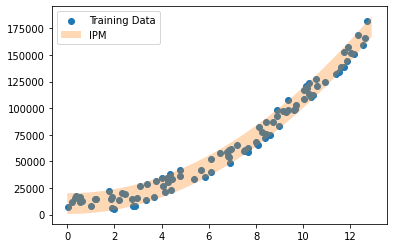

For a test set generated from the same function as the training data, our model predictions will be enclose the test set with probability greater than 0.7704137287382764


In [1]:
import PyIPM
import numpy as np
import matplotlib.pyplot as plt

rainfall = 13 * np.random.rand(100).reshape(-1, 1)
umbrellas = 1000 * rainfall.squeeze(-1) ** 2 + 20000 * np.random.rand(100)

model = PyIPM.IPM(polynomial_degree=2)

model.fit(rainfall, umbrellas)

x_plot = np.arange(0, 13, 0.1)
upper_bound, lower_bound = model.predict(x_plot.reshape(-1, 1))

plt.scatter(rainfall, umbrellas, label="Training Data")
plt.fill_between(
    x_plot,
    lower_bound.squeeze(-1),
    upper_bound.squeeze(-1),
    alpha=0.3,
    label="IPM"
)
plt.legend()
plt.show()

print("For a test set generated from the same function as the training data, "
      "our model predictions will be enclose the test set with probability "
      "greater than {}".format(model.get_model_reliability()))

This example demonstrates the benefits of Interval Predictor Models: few assumptions are required, but a model which fits the data well can be obtained, alongside rigorous uncertainty quantification.